In [1]:
import requests
# import simplejson as json
import pandas as pd

# Get data using requests library and pandas

In [2]:
# goog_json_string = "https://www.quandl.com/api/v3/datatables/WIKI/PRICES.json?ticker=GOOG&api_key=rKssTuYeBY6s29yRGzHA"

curr_ticker = 'GOOG'
curr_metric = 'close' #open, close, high, low

params = {'ticker':curr_ticker,'api_key':'rKssTuYeBY6s29yRGzHA'}
r = requests.get("https://www.quandl.com/api/v3/datatables/WIKI/PRICES.json", params)

In [3]:
# r.json()['datatable']['columns']

In [4]:
# r.json()['datatable']['data']

In [5]:
# len(r.json()['datatable']['data'])

In [3]:
col_names = [x['name'] for x in r.json()['datatable']['columns']]
# print(col_names)

In [4]:
df = pd.DataFrame(r.json()['datatable']['data'],columns=col_names)

In [5]:
# df.shape

In [6]:
df.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
0,GOOG,2018-03-27,1063.00,1064.84,996.92,1005.10,3029471.0,0.0,1.0,1063.00,1064.84,996.92,1005.10,3029471.0
1,GOOG,2018-03-26,1046.00,1055.63,1008.40,1053.21,2558385.0,0.0,1.0,1046.00,1055.63,1008.40,1053.21,2558385.0
2,GOOG,2018-03-23,1047.03,1063.36,1021.22,1021.57,2113497.0,0.0,1.0,1047.03,1063.36,1021.22,1021.57,2113497.0
3,GOOG,2018-03-22,1081.88,1082.90,1045.91,1049.08,2580374.0,0.0,1.0,1081.88,1082.90,1045.91,1049.08,2580374.0
4,GOOG,2018-03-21,1092.74,1106.30,1085.15,1090.88,1640709.0,0.0,1.0,1092.74,1106.30,1085.15,1090.88,1640709.0


# Plot data using bokeh

In [7]:
import numpy as np # we will use this later, so import it now

from bokeh.io import output_notebook, show
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

In [9]:
datetimes = pd.to_datetime( df['date'])
print(datetimes)
print(df['date'])

0      2018-03-27
1      2018-03-26
2      2018-03-23
3      2018-03-22
4      2018-03-21
          ...    
1002   2014-04-02
1003   2014-04-01
1004   2014-03-31
1005   2014-03-28
1006   2014-03-27
Name: date, Length: 1007, dtype: datetime64[ns]
0       2018-03-27
1       2018-03-26
2       2018-03-23
3       2018-03-22
4       2018-03-21
           ...    
1002    2014-04-02
1003    2014-04-01
1004    2014-03-31
1005    2014-03-28
1006    2014-03-27
Name: date, Length: 1007, dtype: object


In [10]:
# create a new plot (with a title) using figure
p = figure(x_axis_type="datetime", plot_width=400, plot_height=400, title=f"Quandl WIKI Prices: {curr_ticker}: {curr_metric}")

# add a line renderer
p.line(pd.to_datetime(df['date']), df[curr_metric], line_width=1)
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Price (U.S. Dollars)'

show(p) # show the results

# Bokeh html plot

In [16]:
import jinja2
from bokeh.embed import components

# IMPORTANT NOTE!! The version of BokehJS loaded in the template should match 
# the version of Bokeh installed locally.

template = jinja2.Template("""
<!DOCTYPE html>
<html lang="en-US">

<link
    href="http://cdn.pydata.org/bokeh/release/bokeh-0.13.0.min.css"
    rel="stylesheet" type="text/css"
>
<script 
    src="http://cdn.pydata.org/bokeh/release/bokeh-2.0.1.min.js"
></script>

<body>

    <h1>Hello Bokeh!</h1>
    
    <p> Below is a simple plot of stock closing prices </p>
    
    {{ script }}
    
    {{ div }}

</body>

</html>
""")

In [17]:
# create a new plot (with a title) using figure
p = figure(x_axis_type="datetime", plot_width=400, plot_height=400, title=f"Quandl WIKI Prices: {curr_ticker}: {curr_metric}")

# add a line renderer
p.line(pd.to_datetime(df['date']), df[curr_metric], line_width=1)
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Price (U.S. Dollars)'

# show(p) # show the results

# Get html components of plot
script, div = components(p)

In [18]:
from flask import Flask
app = Flask(__name__)

@app.route('/')
def hello_bokeh():
   return template.render(script=script, div=div)

In [ ]:
# Uncomment to run the Flask Server. Use Kernel -> Interrupt from Notebook menubar to stop 
app.run(port=5000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [30/Mar/2020 16:55:40] "GET / HTTP/1.1" 200 -


# Plot using Matplotlib

Text(0.5, 1.0, 'Quandl WIKI Prices: GOOG: close')

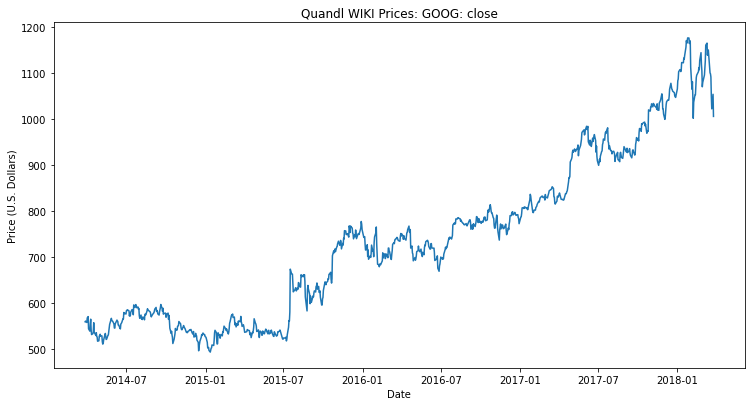

In [24]:
from matplotlib import pyplot as plt
# %matplotlib inline

fig= plt.figure(figsize=(12,6))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

l1 = ax.plot(pd.to_datetime(df['date']), df[curr_metric])

plt.xlabel('Date')
plt.ylabel('Price (U.S. Dollars)')
plt.title(f"Quandl WIKI Prices: {curr_ticker}: {curr_metric}")
        


In [23]:
fig.savefig('graph.png')
# fig.savefig('foo.pdf')